In [346]:
# Wind Speed Analysis Project Using Met Éireann Data

# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Dataset Insights

In [347]:
# Generate dataset information.
df = pd.read_csv('mly2921.csv', skiprows=19)
print (df)

     2006  4  0   53.5   9.1  14  14.1
0    2006  5  0  160.3  27.3  22    22
1    2006  6  0   36.0  11.0   7     7
2    2006  7  0   69.8  24.4  15    15
3    2006  8  0   66.6  10.7  15    15
4    2006  9  0  234.1  47.5  20    20
..    ... .. ..    ...   ...  ..   ...
202  2024  4  0   95.3  18.5  21    17
203  2024  5  0   65.1  12.4  12     9
204  2024  6  0   67.6  17.8  15    14
205  2024  7  0   74.6  15.0  19    15
206  2024  8  0  207.4  26.4  27    22

[207 rows x 7 columns]


In [348]:
# Generate a preview of the dataset.
df.head()

,2006,4,0,53.5,9.1,14,14.1
0,2006,5,0,160.3,27.3,22,22
1,2006,6,0,36.0,11.0,7,7
2,2006,7,0,69.8,24.4,15,15
3,2006,8,0,66.6,10.7,15,15
4,2006,9,0,234.1,47.5,20,20


In [349]:
# Generate the last 5 rows of the dataset.
df.tail()

,2006,4,0,53.5,9.1,14,14.1
202,2024,4,0,95.3,18.5,21,17
203,2024,5,0,65.1,12.4,12,9
204,2024,6,0,67.6,17.8,15,14
205,2024,7,0,74.6,15.0,19,15
206,2024,8,0,207.4,26.4,27,22


In [350]:
# Generate informations of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    207 non-null    int64  
 1   4       207 non-null    int64  
 2   0       207 non-null    int64  
 3   53.5    207 non-null    float64
 4   9.1     207 non-null    object 
 5   14      207 non-null    int64  
 6   14.1    207 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.4+ KB


In [351]:
# Generate summary statistics for the dataset.
df.describe()

,2006,4,0,53.5,14,14.1
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2014.951691,6.473430,0.024155,131.940097,19.362319,16.695652
std,5.461923,3.410153,0.153901,67.863286,5.815040,5.941391
min,2006.000000,1.000000,0.000000,12.500000,5.000000,1.000000
25%,2010.000000,4.000000,0.000000,80.050000,15.000000,12.000000
50%,2015.000000,6.000000,0.000000,118.400000,19.000000,17.000000
75%,2020.000000,9.000000,0.000000,178.700000,24.500000,21.000000
max,2024.000000,12.000000,1.000000,366.300000,31.000000,31.000000


In [352]:
# Count the number of null.
df.isnull().sum()

2006    0
4       0
0       0
53.5    0
9.1     0
14      0
14.1    0
dtype: int64

### Shape of the Dataset

In [353]:
# Display the dimensions of the dataset (rows and columns).
print("Shape of the dataset:", df.shape)

Shape of the dataset: (207, 7)


### Column Names

In [354]:
# Display the column names of the dataset.
print("Columns in the dataset:", df.columns.tolist())

Columns in the dataset: ['2006', '4', '0', '53.5', '9.1', '14', '14.1']


### Unique Values in Each Column

In [355]:
# Display the number of unique values in each column.
print("Unique values per column:\n", df.nunique())

Unique values per column:
 2006     19
4        12
0         2
53.5    200
9.1     146
14       27
14.1     28
dtype: int64


### Sum of Missing Values

In [356]:
# Count and display the total number of missing values in the dataset.
print("Total missing values in the dataset:", df.isnull().sum().sum())

Total missing values in the dataset: 0


### First Non-Null Entries

In [357]:
# Display the first non-null values in each column.
print("First non-null values in each column:\n", df.apply(pd.Series.first_valid_index))

First non-null values in each column:
 2006    0
4       0
0       0
53.5    0
9.1     0
14      0
14.1    0
dtype: int64


In [358]:
## Statistical Insights

### Column-Specific Summary

In [359]:
# Display summary statistics for a specific column.
print("Summary statistics for the 'Rainfall' column:\n", df['53.5'].describe())


Summary statistics for the 'Rainfall' column:
 count    207.000000
mean     131.940097
std       67.863286
min       12.500000
25%       80.050000
50%      118.400000
75%      178.700000
max      366.300000
Name: 53.5, dtype: float64


### Maximum and Minimum Values




In [360]:
# Display the maximum and minimum values for each column.
print("Maximum values:\n", df.max())
print("Minimum values:\n", df.min())

Maximum values:
 2006     2024
4          12
0           1
53.5    366.3
9.1       9.4
14         31
14.1       31
dtype: object
Minimum values:
 2006    2006
4          1
0          0
53.5    12.5
9.1         
14         5
14.1       1
dtype: object


### Heatmap for Missing Values

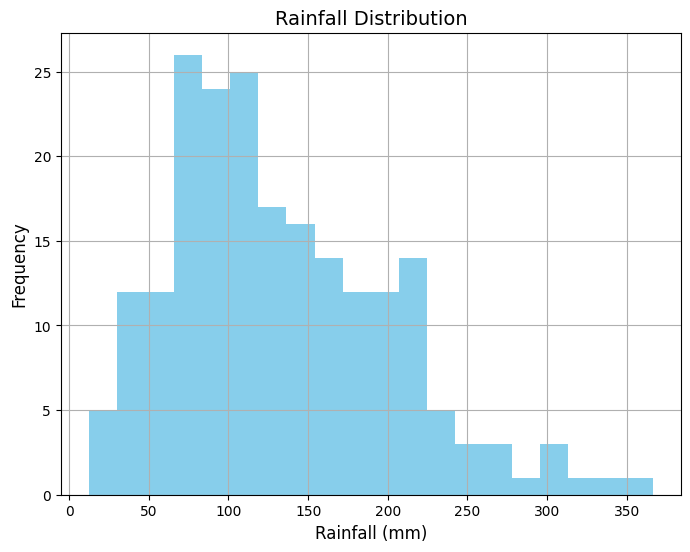

In [361]:
# Plot a histogram for the 'Rainfall' column with a single color.
df['53.5'].hist(bins=20, figsize=(8, 6), color='skyblue')

# Add titles and labels.
plt.title("Rainfall Distribution", fontsize=14)
plt.xlabel("Rainfall (mm)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Boxplot of a Column

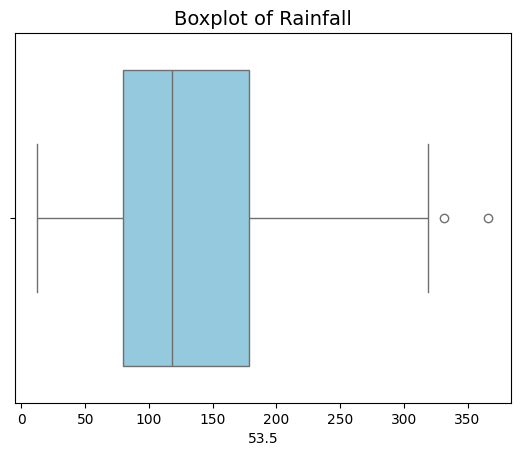

In [362]:
# Plot a boxplot for the 'Rainfall' column with a single color.
sns.boxplot(x=df['53.5'], color='skyblue')

# Add the title and show the plot.
plt.title("Boxplot of Rainfall", fontsize=14)
plt.show()

### Line Plot of a Time Series

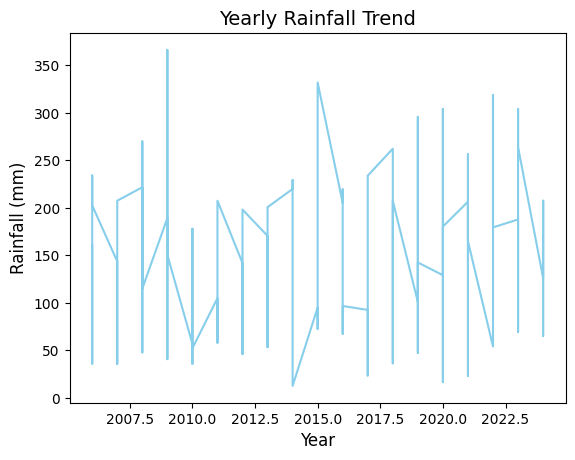

In [363]:
# Plot a line graph to visualize yearly rainfall with 'skyblue' color.
plt.plot(df['2006'], df['53.5'], color='skyblue')

# Add the title and labels.
plt.title("Yearly Rainfall Trend", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)

# Show the plot.
plt.show()

## Additional Insights

### Check for Duplicates

In [364]:
# Check if there are any duplicate rows in the dataset.
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


### Memory Usage

In [365]:
# Display the memory usage of the dataset.
print("Memory usage of the dataset:\n", df.memory_usage(deep=True))

Memory usage of the dataset:
 Index      128
2006      1656
4         1656
0         1656
53.5      1656
9.1      12611
14        1656
14.1      1656
dtype: int64


### Convert Column Names for Readability

In [366]:
# Convert column names to more readable ones.
df.columns = ['Year', 'Month', 'Indicator', 'Rainfall', 'Temperature', 'RainDays', 'WetDays']
print("Renamed columns:\n", df.columns)

Renamed columns:
 Index(['Year', 'Month', 'Indicator', 'Rainfall', 'Temperature', 'RainDays',
       'WetDays'],
      dtype='object')
